# Project 1: Borrowers and Lenders

## Group 11

This dataset is financial dataset related to the loan, borrowers, lenders, interest
rates from Prosper. Prosper. is a San Francisco, California based company
specializing in loans at low interest rates to the borrowers.

We want to predict if a customer will default on their loan or not

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
prosper = prosper.drop_duplicates()

In [5]:
prosper.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014688,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.126031,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.092813,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.053481,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


In [6]:
prosper.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [7]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [8]:
numeric_features = list(prosper[['Term','BorrowerAPR',\
                                 'BorrowerRate','LenderYield','ListingCategory (numeric)','EmploymentStatusDuration',\
                                 'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines',\
                                 'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',\
                                 'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years',\
                                 'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit',\
                                 'StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',\
                                 'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed',\
                                 'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination',\
                                 'LoanOriginalAmount','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments',\
                                 'LP_InterestandFees','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']])
                                                              
                                 

In [9]:
categorical_features = list(prosper[['BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner',\
                                     'CurrentlyInGroup','IncomeVerifiable']])

#### Here we are building our first pipeline

In [10]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [11]:
train_set, test_set = train_test_split(prosper, test_size=0.33, random_state=42)

In [12]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
len(prosper_prepared[1])

176

In [13]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


In [14]:
len(prosper_prepared[1])

176

In [15]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)

clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000).fit(X_train, y_train)

In [16]:
clf.score(X_train, y_train)

0.9702503373200414

In [17]:
len(X_train[1])

176

In [18]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     72987
           1       0.84      0.39      0.54      3350

    accuracy                           0.97     76337
   macro avg       0.91      0.70      0.76     76337
weighted avg       0.97      0.97      0.97     76337



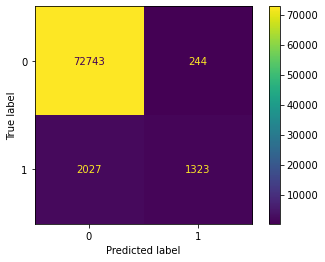

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

###### Results
Our model gives us some predictions but it can improve a lot. 
We would like to see fewer false negatives since those mean that the customer defaults but we predicted he/she wouldn't.

In [20]:
feature_names = np.array(numeric_features).view() 

In [21]:
def get_feature_names():  
        
        column_transformer = full_pipeline2 
        
        new_feature_names = np.insert(feature_names,0,'')

        for i, transformer_item in enumerate(column_transformer.transformers_):
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):

                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:
                    names = list(transformer.get_feature_names(orig_feature_names))
                else:
                    names = list(transformer.get_feature_names())
                new_feature_names= np.append(new_feature_names,names)
                
        return new_feature_names

In [22]:
column_name = get_feature_names()
len(column_name)

177

#### Here we want to find the best hyperparameter for our model

In [23]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


Classification report: 
 
                precision    recall  f1-score   support

           0       0.97      1.00      0.98     72987
           1       0.84      0.40      0.54      3350

    accuracy                           0.97     76337
   macro avg       0.91      0.70      0.76     76337
weighted avg       0.97      0.97      0.97     76337



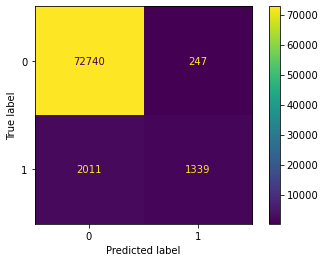

In [24]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_train, y_pred, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_train, y_pred, zero_division=0))
plt.show()

In [25]:
len(X_train[1])

176

###### Results:
The model is now predicting 1789 true values but 2701 were predicted wrongly. 


In [26]:
## The code above will take a lot of time to be run

In [27]:
len(column_name)
len(numeric_features)

41

In [28]:
len(X_train[1])

176

Feature: Term, Score: -0.88705
Feature: BorrowerAPR, Score: -0.82985
Feature: BorrowerRate, Score: 1.28129
Feature: LenderYield, Score: 0.00000
Feature: ListingCategory (numeric), Score: 0.04566
Feature: EmploymentStatusDuration, Score: 0.01078
Feature: CreditScoreRangeLower, Score: 0.00000
Feature: CreditScoreRangeUpper, Score: 0.09987
Feature: CurrentCreditLines, Score: 0.22784
Feature: OpenCreditLines, Score: -0.06476
Feature: TotalCreditLinespast7years, Score: 0.10276
Feature: OpenRevolvingAccounts, Score: -0.09918
Feature: OpenRevolvingMonthlyPayment, Score: 0.11689
Feature: CurrentDelinquencies, Score: 0.05278
Feature: AmountDelinquent, Score: -0.03418
Feature: DelinquenciesLast7Years, Score: -0.13879
Feature: PublicRecordsLast10Years, Score: -0.03499
Feature: PublicRecordsLast12Months, Score: 0.02669
Feature: RevolvingCreditBalance, Score: -0.01618
Feature: BankcardUtilization, Score: -0.00083
Feature: AvailableBankcardCredit, Score: -0.10886
Feature: StatedMonthlyIncome, Score:

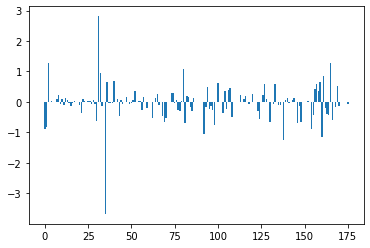

In [29]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Now we want to see which features are important and weed out those that aren't

In [30]:
features = pd.DataFrame({'features': column_name[1:] , 'importance': list(importance)}, columns=['features', 'importance'])
## Negative importance coefficient also should be taken in consideration since it is somehow correlated negatively with the possibility of a user to apply for term deposit so :
features["importance"]= np.abs(features["importance"])
features = features.sort_values(by=['importance'], ascending=False)
features
Unimportante_features = features[features["importance"]==0]["features"].array
len(Unimportante_features)


44

In [31]:
for j in Unimportante_features:
    for i in numeric_features:
        if i == j:
            numeric_features.remove(i)

In [32]:
for j in Unimportante_features:
    for i in categorical_features:
        if i == j:
            categorical_features.remove(i)

In [33]:
len(numeric_features)

37

In [34]:
len(categorical_features)

6

In [35]:
len(X_train[1])

176

#### Now we create the pipeline and only use the important features

In [36]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [37]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
X_train = prosper_prepared

In [38]:
len(X_train[1])

172

In [39]:
y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9702110378977429

In [40]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     72987
           1       0.84      0.39      0.54      3350

    accuracy                           0.97     76337
   macro avg       0.91      0.70      0.76     76337
weighted avg       0.97      0.97      0.96     76337



In [41]:
len(X_train[1])

172

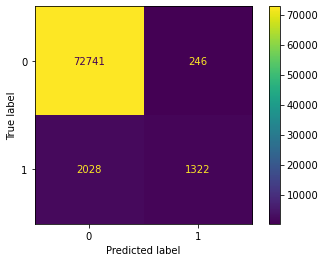

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

###### Results:
Bearly any change

In [43]:
column_name = get_feature_names()

#### Now we want to find the best hyperparameter

In [44]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42, max_iter= 5000)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


In [45]:
len(X_train[1])

172

Classification report: 
 
                precision    recall  f1-score   support

           0       1.00      0.97      0.98     74750
           1       0.40      0.84      0.54      1587

    accuracy                           0.97     76337
   macro avg       0.70      0.91      0.76     76337
weighted avg       0.98      0.97      0.98     76337



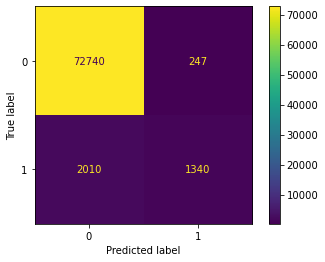

In [46]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_train, y_pred, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_pred, y_train))
plt.show()

###### Results:
The model result still did not change a lot 


Feature: Term, Score: -0.88703
Feature: BorrowerAPR, Score: -0.83015
Feature: BorrowerRate, Score: 1.28158
Feature: LenderYield, Score: 0.04566
Feature: ListingCategory (numeric), Score: 0.01077
Feature: EmploymentStatusDuration, Score: 0.09986
Feature: CreditScoreRangeLower, Score: 0.22787
Feature: CreditScoreRangeUpper, Score: -0.06478
Feature: CurrentCreditLines, Score: 0.10276
Feature: OpenCreditLines, Score: -0.09917
Feature: TotalCreditLinespast7years, Score: 0.11691
Feature: OpenRevolvingAccounts, Score: 0.05279
Feature: OpenRevolvingMonthlyPayment, Score: -0.03418
Feature: CurrentDelinquencies, Score: -0.13878
Feature: AmountDelinquent, Score: -0.03499
Feature: DelinquenciesLast7Years, Score: 0.02669
Feature: PublicRecordsLast10Years, Score: -0.01619
Feature: PublicRecordsLast12Months, Score: -0.00082
Feature: RevolvingCreditBalance, Score: -0.10887
Feature: BankcardUtilization, Score: -0.35700
Feature: AvailableBankcardCredit, Score: 0.10508
Feature: StatedMonthlyIncome, Score

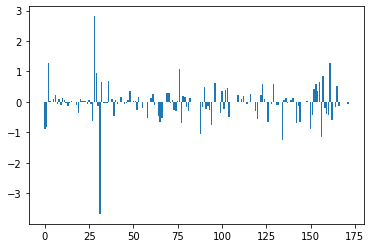

In [47]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Here we want to see how both the Precision and the Recall change depending on which threshold we use

172


(0.0, 1.0)

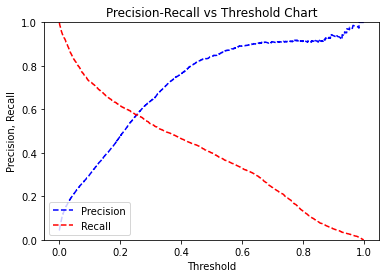

In [48]:
### Predict test_y values and probabilities based on fitted logistic regression model
from sklearn import metrics
predTest = lg_reg.predict(X_train)
print(len(X_train[1]))

probs_y=lg_reg.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#### Here we plot the ROC curve

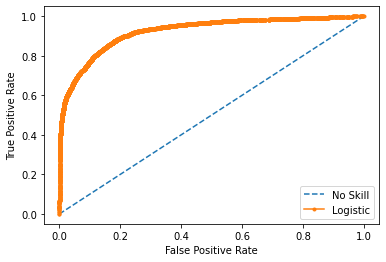

In [49]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat =lg_reg.predict_proba(X_train) 
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

##Running the example fits a logistic regression model on the training dataset 
##Then evaluates it using a range of thresholds on the test set, creating the ROC Curve

#### From the ROC curve we choose the best Threshold


In [50]:
from numpy import * 
yhat = lg_reg.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold= %f' % (best_thresh))

Best Threshold= 0.033294


In [51]:
len(X_train[1])

172

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report
THRESHOLD = best_thresh
preds = np.where(lg_reg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [53]:
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     72987
           1       0.18      0.87      0.30      3350

    accuracy                           0.82     76337
   macro avg       0.59      0.85      0.60     76337
weighted avg       0.96      0.82      0.87     76337



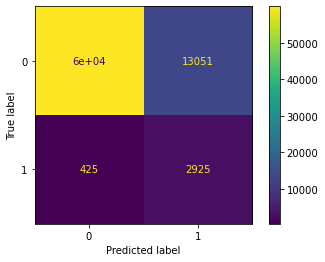

In [54]:
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

###### Results:
Here we see an improvement. We have decrease our main evaluation criteria: False Negatives.
That means that fewer people are defaulting that we did not predict that would default. We are still predicting a lot of clients to default that would not default

#### Now we will run the model using the test dataset

In [55]:
bank_prepared2 = full_pipeline2.fit_transform(test_set)
len(bank_prepared2[1])

172

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     36873
           1       0.36      0.84      0.51       727

    accuracy                           0.97     37600
   macro avg       0.68      0.90      0.75     37600
weighted avg       0.98      0.97      0.97     37600



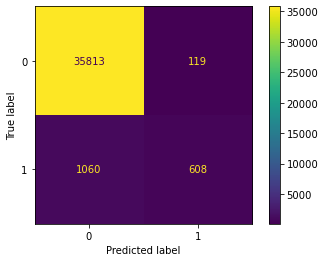

In [56]:
#### testing with logistic regression
bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_prepared2
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = lg_reg.predict(X_test)

print(classification_report(predTest, y_test))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

###### Results:
Our model performs well on the test set. The model predictions are good, but could be better.

#### Now we change the threshold for the model

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     29710
           1       0.86      0.18      0.30      7890

    accuracy                           0.82     37600
   macro avg       0.84      0.59      0.60     37600
weighted avg       0.83      0.82      0.77     37600



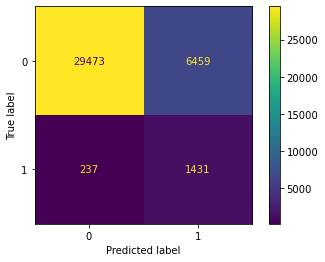

In [57]:
#### after changing the threshold with the test set
preds = np.where(lg_reg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(preds, y_test))
CM = confusion_matrix(y_test, preds, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

###### Results:
By changing the threshold our model performs even better. We see very few false negatives.

#### Now we'll build a random forest model

In [58]:
###########Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_estimators=10, random_state= 42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

#### We use the ROC curve to find the best threshold

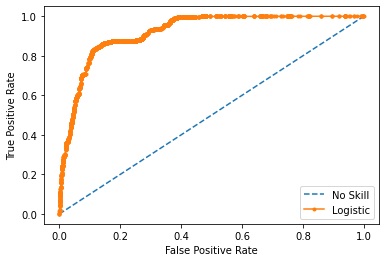

New threshold :  0.08534337793844697




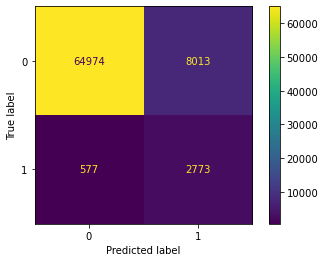

In [59]:
from numpy import * 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)
y_pred= rf.predict(X_train)

yhat = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
THRESHOLD1 = best_thresh
print("New threshold : ", THRESHOLD1)
print("\n")
preds = np.where(rf.predict_proba(X_train)[:,1] > THRESHOLD1, 1, 0)
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

###### Results:
Our random forest model performs even better then the logistic regression model. Only a fraction of the predictions are false negatives. On the otherhand, our model is predicting a lot of false positives.

#### Here we'll use our model on the test dataset

(0.0, 1.0)

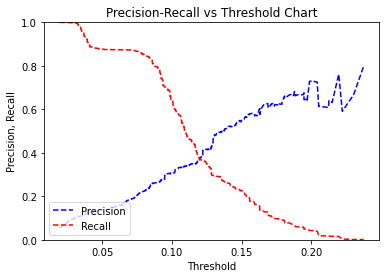

In [60]:
### Predict test_y values and probabilities based on fitted random forest model
from sklearn import metrics
predTest = rf.predict(X_train)

probs_y= rf.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [61]:
print("Classification report: \n \n ", classification_report(y_train, y_pred ,zero_division=0 ))

Classification report: 
 
                precision    recall  f1-score   support

           0       0.96      1.00      0.98     72987
           1       0.00      0.00      0.00      3350

    accuracy                           0.96     76337
   macro avg       0.48      0.50      0.49     76337
weighted avg       0.91      0.96      0.93     76337



              precision    recall  f1-score   support

           0       1.00      0.96      0.98     37600
           1       0.00      0.00      0.00         0

    accuracy                           0.96     37600
   macro avg       0.50      0.48      0.49     37600
weighted avg       1.00      0.96      0.98     37600



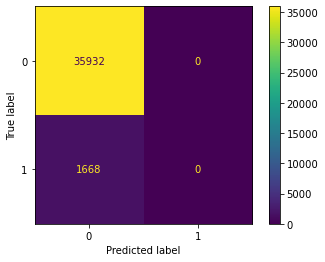

In [62]:
#### testing with random forest

bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_prepared2
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = rf.predict(X_test)

print(classification_report(predTest, y_test,zero_division=0))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_, )
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

###### Results:
The predictions are poor. Our model does not make any default predictions. This model is not helpful.

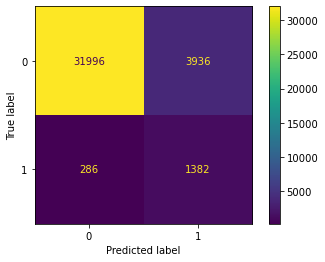

In [63]:
#### after changing the threshold with the test set
preds = np.where(rf.predict_proba(X_test)[:,1] > THRESHOLD1, 1, 0)
CM = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

###### Results:
After changing the threshold our model performs very well on the test data. We have 286 false negatives. We can still improve on not predicting false positives.